In [1]:
import pandas as pd
import gensim
from gensim.models import CoherenceModel

import matplotlib.pyplot as plt
from pprint import pprint

import pyLDAvis.gensim
import pickle 
import pyLDAvis
import os
import numpy as np
import tqdm

In [2]:
data = pd.read_csv('scrape/restaurant-data/cleaned_restaurant_reviews.csv', index_col=0)

In [3]:
data = data.reset_index(drop=True)

In [4]:
data

,url,name,neighbourhood,price,categories,review,user,date,cleaned_price,cleaned_categories,...,Western,Recommended,Sustainable,Novel,Desserts,Bites,Supper,Breakfast & Brunch,Halal,region
0,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nFish Ball Minced Meat Noodle\nFishball, meat...",Triffany Lim,21m ago,5.0,"['Local Delights', 'Supper', 'Value']",...,0,0,0,0,0,0,1,0,0,East
1,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nOrh lua\nThere are a couple of stores, but g...",Ally Tan,Jul 30 at 4:12pm,5.0,"['Local Delights', 'Supper', 'Value']",...,0,0,0,0,0,0,1,0,0,East
2,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nPeanut sauce was ace\nI love a good satay pe...,Ally Tan,Jul 30 at 4:10pm,5.0,"['Local Delights', 'Supper', 'Value']",...,0,0,0,0,0,0,1,0,0,East
3,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nClassic BBQ wings\nJuicy and tasty like it’s...,Ally Tan,Jul 30 at 4:09pm,5.0,"['Local Delights', 'Supper', 'Value']",...,0,0,0,0,0,0,1,0,0,East
4,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nBBQ stingray\nIt was yummy but slight warnin...,Ally Tan,Jul 30 at 4:08pm,5.0,"['Local Delights', 'Supper', 'Value']",...,0,0,0,0,0,0,1,0,0,East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28294,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box D $13.80\n川椒雞柳 | 鮮腐竹蝦球 | 清炒西蘭花 | ...,K T,"Oct 27, 2020",50.0,"['Chinese', 'Accessible']",...,0,0,0,0,0,0,0,0,0,Central
28295,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box C $11.80\n普寧豆醬走地雞 | 鮮菌翡翠豆腐 | 蒜茸炒四...,K T,"Oct 26, 2020",50.0,"['Chinese', 'Accessible']",...,0,0,0,0,0,0,0,0,0,Central
28296,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box B $11.80\n蒜子豆豉凉瓜黑豬梅肉 | 香菌扒豆腐 | 蒜茸...,K T,"Oct 9, 2020",50.0,"['Chinese', 'Accessible']",...,0,0,0,0,0,0,0,0,0,Central
28297,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\n潮州糜 Bento A $12.80\n鹵鴨拼豆干 | 川椒雞 | 欖菜四季苗| 菜脯...,K T,"Oct 1, 2020",50.0,"['Chinese', 'Accessible']",...,0,0,0,0,0,0,0,0,0,Central


In [5]:
restaurant_review_df = data[['url', 'cleaned_text']]
restaurant_review_df = restaurant_review_df.groupby(['url'], as_index = False).agg({'cleaned_text': ' '.join})

In [6]:
restaurant_review_df

,url,cleaned_text
0,https://www.burpple.com/108-matcha-saro?bp_ref...,matcha soft serve parfait deluxe s850 strong m...
1,https://www.burpple.com/136-hong-kong-street-f...,favourite tze char place zhi char feast family...
2,https://www.burpple.com/15-stamford?bp_ref=%2F...,amaze four hand dinner chef alvin chef jay fou...
3,https://www.burpple.com/25-degrees-singapore?b...,burger oh yesh loveeeee burger goooooood locat...
4,https://www.burpple.com/46-mittsu?bp_ref=%2Ff%...,firebird 15 signature firebird koreaninspired ...
...,...,...
840,https://www.burpple.com/yun-nans?bp_ref=%2Ff%2...,Fried Rice Noodles Seafood Shrimp Soup 1480 St...
841,https://www.burpple.com/zafferano?bp_ref=%2Ff%...,spaghetti san marzano tomato oregano 32 portio...
842,https://www.burpple.com/zai-shun-curry-fish-he...,chap chye deep fry prawn roll meat patty salt ...
843,https://www.burpple.com/zazz-pizza?bp_ref=%2Ff...,heard zazzpizzasg juliuslim intro famous fresh...


## LDA

In [7]:
# create dictionary
docs = data['cleaned_text'] ###
processed_docs = [d.split() for d in docs]
dictionary = gensim.corpora.Dictionary(processed_docs)

In [8]:
# term document frequency
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [9]:
lda_model = gensim.models.LdaMulticore(corpus=bow_corpus,
                                       id2word=dictionary,
                                       num_topics=10,
                                       alpha=0.1, # document topic density. higher alpha, documents composed of more topics
                                       eta=0.01, # topic word density. higher beta, topics composed of large number of words in the corpus
                                       chunksize=100, # number of documents to consider at once
                                       passes=10, # number of times to go through the entire corpus
                                       random_state =100)

In [10]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[bow_corpus]

[(0,
  '0.015*"food" + 0.009*"place" + 0.009*"menu" + 0.009*"dish" + 0.009*"set" + '
  '0.008*"time" + 0.007*"good" + 0.007*"restaurant" + 0.007*"try" + '
  '0.006*"come"'),
 (1,
  '0.036*"beef" + 0.021*"great" + 0.021*"food" + 0.021*"good" + 0.014*"try" + '
  '0.014*"recommend" + 0.013*"rib" + 0.012*"steak" + 0.012*"tender" + '
  '0.011*"definitely"'),
 (2,
  '0.046*"egg" + 0.023*"pasta" + 0.018*"good" + 0.016*"bread" + 0.015*"toast" '
  '+ 0.012*"salmon" + 0.012*"taste" + 0.011*"dish" + 0.011*"sauce" + '
  '0.011*"breakfast"'),
 (3,
  '0.019*"flavour" + 0.014*"sweet" + 0.014*"sauce" + 0.009*"savoury" + '
  '0.009*"rice" + 0.008*"serve" + 0.008*"fish" + 0.007*"fresh" + '
  '0.007*"restaurant" + 0.007*"dish"'),
 (4,
  '0.023*"singapore" + 0.021*"available" + 0.021*"delivery" + 0.020*"cake" + '
  '0.018*"cheesecake" + 0.017*"new" + 0.012*"takeaway" + 0.011*"menu" + '
  '0.011*"road" + 0.010*"durian"'),
 (5,
  '0.036*"chicken" + 0.029*"fry" + 0.026*"rice" + 0.019*"pork" + 0.018*"sauce" '

In [11]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
lda_score = coherence_model_lda.get_coherence()
lda_score

0.4580346127981544

In [12]:
def compute_coherence_values(k):
    
    lda_model = gensim.models.LdaMulticore(corpus=bow_corpus,
                                           id2word=dictionary,
                                           num_topics=k,
                                           alpha=0.1, # document topic density. higher alpha, documents composed of more topics
                                           eta=0.01, # topic word density. higher beta, topics composed of large number of words in the corpus
                                           chunksize=100, # number of documents to consider at once
                                           passes=10, # number of times to go through the entire corpus
                                           random_state =100)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [13]:
# grid = {}
# grid['Validation_Set'] = {}

# # Topics range
# min_topics = 2
# max_topics = 11
# step_size = 1
# topics_range = range(min_topics, max_topics, step_size)

# # Alpha parameter
# alpha = list(np.arange(0.01, 1, 0.3))
# alpha.append('symmetric')
# alpha.append('asymmetric')

# # Beta parameter
# beta = list(np.arange(0.01, 1, 0.3))
# beta.append('symmetric')


# model_results = {
#                  'Topics': [],
#                  'Alpha': [],
#                  'Beta': [],
#                  'Coherence': []
#                 }

# # Can take a long time to run
# if 1 == 1:
#     pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)))
    
#     # iterate through number of topics
#     for k in topics_range:
#         # iterate through alpha values
#         for a in alpha:
#             # iterare through beta values
#             for b in beta:
#                 # get the coherence score for the given parameters
#                 cv = compute_coherence_values(k=k, a=a, b=b)
#                 # Save the model results
#                 model_results['Topics'].append(k)
#                 model_results['Alpha'].append(a)
#                 model_results['Beta'].append(b)
#                 model_results['Coherence'].append(cv)
                
#                 pbar.update(1)
#     pd.DataFrame(model_results).to_csv('restaurant_lda_tuning_results.csv', index=False)
#     pbar.close()

In [14]:
# iterate through number of topics
coherence_values = []
topics_range = range(2,11,1)

for k in topics_range:
    value = compute_coherence_values(k)
    print(k)
    print(value)
    coherence_values.append(value)

2
0.40680757306118215
3
0.44280404019053715
4
0.4240960233191311
5
0.4526091876356501
6
0.46592725906181554
7
0.46214476355383793
8
0.4713478767881586
9
0.47782320875421747
10
0.459238876839272


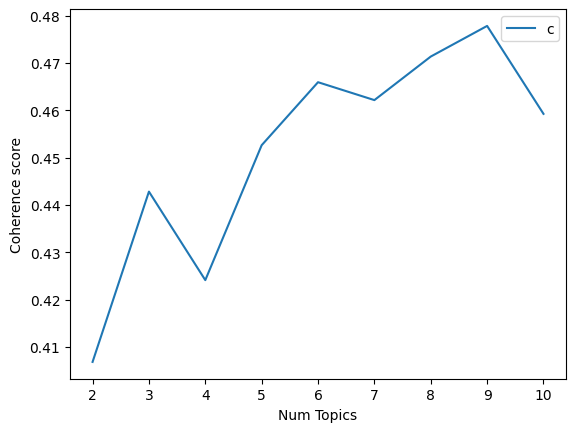

In [15]:
# Show graph
plt.plot(topics_range, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# choose num topics == 6 instead since 6 & 7 is stable.

In [24]:
# optimal parameters
num_topics = 4 ### CHANGE THIS

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=bow_corpus,
                                        id2word=dictionary,
                                        num_topics=num_topics,
                                        alpha=0.1, # document topic density. higher alpha, documents composed of more topics
                                        eta=0.01, # topic word density. higher beta, topics composed of large number of words in the corpus
                                        chunksize=100, # number of documents to consider at once
                                        passes=10, # number of times to go through the entire corpus
                                        random_state =100)
# Print the Keyword in the topics
pprint(lda_model.print_topics())
doc_lda = lda_model[bow_corpus]

[(0,
  '0.012*"food" + 0.011*"good" + 0.010*"dish" + 0.009*"pasta" + 0.007*"burger" '
  '+ 0.007*"truffle" + 0.007*"great" + 0.007*"beef" + 0.007*"place" + '
  '0.007*"cheese"'),
 (1,
  '0.019*"pork" + 0.018*"chicken" + 0.015*"fry" + 0.013*"rice" + '
  '0.013*"noodle" + 0.012*"soup" + 0.011*"sauce" + 0.010*"good" + '
  '0.010*"prawn" + 0.009*"dish"'),
 (2,
  '0.014*"cream" + 0.012*"taste" + 0.012*"like" + 0.011*"sweet" + '
  '0.010*"flavour" + 0.010*"good" + 0.009*"chocolate" + 0.008*"tea" + '
  '0.008*"ice" + 0.008*"try"'),
 (3,
  '0.011*"flavour" + 0.011*"sweet" + 0.009*"singapore" + 0.008*"sauce" + '
  '0.007*"menu" + 0.006*"serve" + 0.006*"new" + 0.006*"available" + '
  '0.006*"cake" + 0.005*"rice"')]


In [25]:
# Visualize the topics 
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('restaurant_ldavis_prepared_'+str(num_topics)+'_')
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dictionary)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, 'restaurant_ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

### https://we1s.ucsb.edu/research/we1s-tools-and-software/topic-model-observatory/tmo-guide/tmo-guide-pyldavis/
# A “relevance metric” slider scale at the top of the right panel controls how the words for a topic are sorted.
# lambda 1: sorts words by their frequency in the topic (red bars)
# lambda 0: sorts words by their "lift". Words whose red bars are nearly as long as their blue bars will be at the top Lift means how much a word's frequency sticks out in a topic above the baseline of its overall frequency in the model

/Users/natalie/opt/anaconda3/envs/bt4221/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.080483  0.075622       1        1  28.877964
2      0.091623 -0.170271       2        1  25.875124
1      0.066718  0.105122       3        1  25.581049
3     -0.238824 -0.010472       4        1  19.665863, topic_info=            Term         Freq        Total Category  logprob  loglift
185         pork  6890.000000  6890.000000  Default  30.0000  30.0000
362      chicken  6709.000000  6709.000000  Default  29.0000  29.0000
19        noodle  4229.000000  4229.000000  Default  28.0000  28.0000
830        cream  5260.000000  5260.000000  Default  27.0000  27.0000
90          soup  4110.000000  4110.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
665         rice  1345.638800  6043.542339   Topic4  -5.2119   0.1242
751   restaurant  1024.119447  2890.333665   Topic4  -5.4849   0.5887
1048         set  1023.694156  3230.488974   Topic4  -5.4853   0.4771
168         dish  1007.941932  7805.080459   Topic4  -5.5008  -0.4206
787         make   779.966598  3930.250913   Topic4  -5.7572   0.0091

[372 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
7341      3  0.998509    1080
3429      2  1.005834     180
1850      1  0.836290   1for1
1850      2  0.140695   1for1
1850      3  0.022511   1for1
...     ...       ...     ...
314       3  0.096753    year
314       4  0.648062    year
2792      2  0.984859  yogurt
2792      4  0.012562  yogurt
3541      4  0.999319      yu

[690 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2, 4])